<a href="https://colab.research.google.com/github/LJadhav25/Linear_regression_data_science/blob/main/Simple_Linear_Regression_(Data_Science).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
from google.colab import files
data = files.upload()

Saving USA_Housing.csv to USA_Housing.csv


In [3]:
housing = pd.read_csv('USA_Housing.csv')
housing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
housing.drop('Address',axis=1,inplace=True)

In [6]:
housing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


In [7]:
housing.corr()*100

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,100.000000,-0.200683,-1.103166,1.978822,-1.623374,63.973378
Avg. Area House Age,-0.200683,100.000000,-0.942829,0.614892,-1.874276,45.254254
Avg. Area Number of Rooms,-1.103166,-0.942829,100.000000,46.269486,0.203993,33.566445
Avg. Area Number of Bedrooms,1.978822,0.614892,46.269486,100.000000,-2.216764,17.107103
Area Population,-1.623374,-1.874276,0.203993,-2.216764,100.000000,40.855588
Price,63.973378,45.254254,33.566445,17.107103,40.855588,100.000000


#SPLIT THE DATA INTO THE X AND Y

In [8]:
housing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


In [9]:
x = housing[['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms',
            'Avg. Area Number of Bedrooms','Area Population']]

In [10]:
y = housing['Price']

In [11]:
x.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.45857,5.682861,7.009188,4.09,23086.80050
1,79248.64245,6.002900,6.730821,3.09,40173.07217
2,61287.06718,5.865890,8.512727,5.13,36882.15940
3,63345.24005,7.188236,5.586729,3.26,34310.24283
4,59982.19723,5.040555,7.839388,4.23,26354.10947


In [12]:
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

# Horizontal Split : 70% Data for training and 30% for Testing

In [13]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.30,random_state=101)

In [18]:
print(X_test.shape)

(1500, 5)


In [19]:
print(X_train.shape)

(3500, 5)


In [20]:
print(Y_train.shape)

(3500,)


In [21]:
print(Y_test.shape)

(1500,)


# Training the model

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lm = LinearRegression()

In [24]:
lm.fit(X_train,Y_train)

LinearRegression()

# Prediction

In [25]:
predict = lm.predict(X_test)

In [26]:
predict

array([1258934.89519475,  822694.63395324, 1742214.39533364, ...,
       1452640.9648123 ,  645797.13020581, 1364943.76220546])

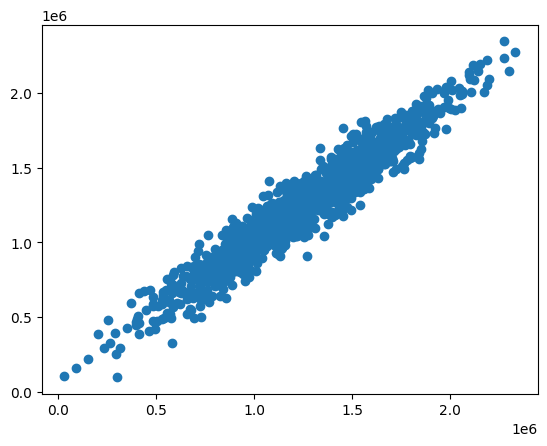

In [27]:
plt.scatter(Y_test,predict)

In [28]:
from sklearn import metrics

In [29]:
print('Mean Absolute Error',metrics.mean_absolute_error(Y_test,predict))

Mean Absolute Error 81257.55794597727


In [30]:
print('Mean Square Error',metrics.mean_squared_error(Y_test,predict))

Mean Square Error 10169125565.180103


In [31]:
print('Mean Square root error',np.sqrt(metrics.mean_squared_error(Y_test,predict)))

Mean Square root error 100842.08231279292
